In [1]:
import pandas as pd
train = pd.read_csv('data/train.csv', sep=',')
train.set_index('PassengerId', inplace=True, drop=True)

In [2]:
from sklearn.model_selection import cross_val_score
from statistics import mean
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return mean(xval)

In [3]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_temp = pd.get_dummies(X[dum], prefix='split_' + dum)
        for col in split_temp:
            X[col] = split_temp[col]
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    to_del = ['Name', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del: del X[col]
    return X, target

X, y = parse_model_2(train.copy())

X.head()

,Age,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
PassengerId,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1
2,38.0,1,0,71.2833,1,0,0,1,0
3,26.0,0,0,7.9250,0,0,1,1,0
4,35.0,1,0,53.1000,1,0,0,1,0
5,35.0,0,0,8.0500,0,0,1,0,1


In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
compute_score(rf, X, y)

0.8025525686869256

In [7]:
import numpy as np

def clf_importance(X, clf):
    import pylab as pl
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    pl.title('Importances')
    for tree in clf.estimators_:
        pl.plot(range(X.shape[1]), tree.feature_importances_[indices], "r")
        pl.plot(range(X.shape[1]), importances[indices], "b")
        pl.show()
    for f in range(X.shape[1]):
        print('%d. feature: %s (%f)' % (f + 1, X.columns[indices[f]], importances[indices[f]]))

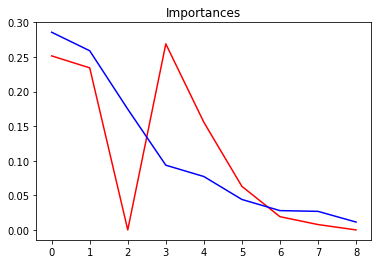

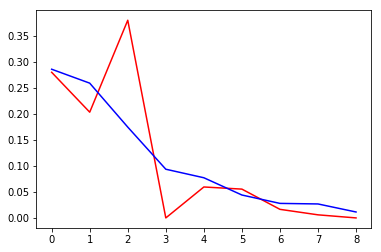

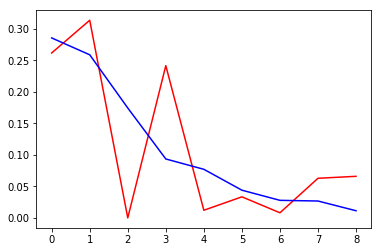

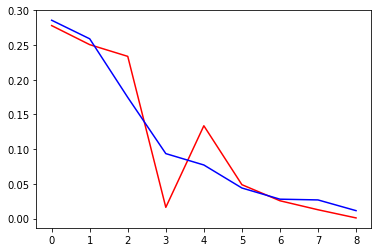

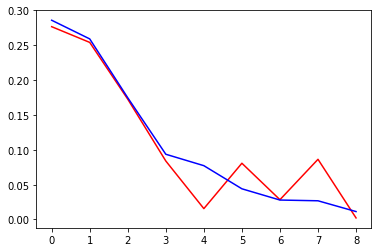

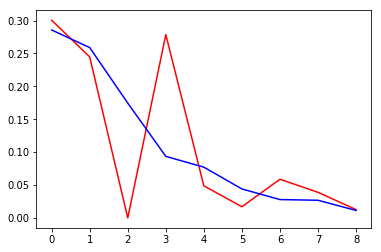

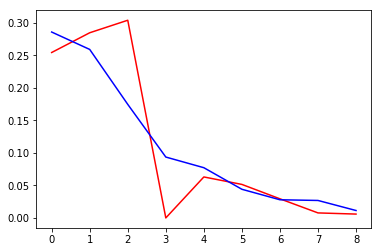

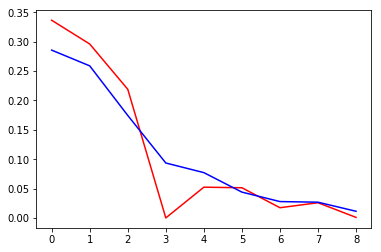

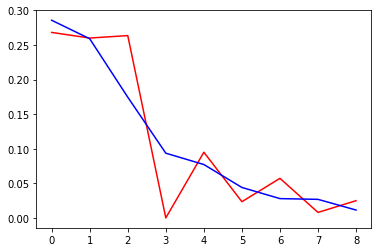

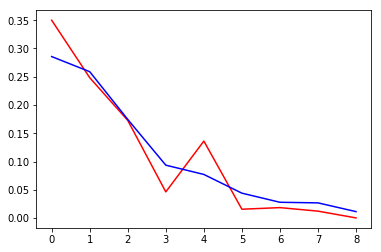

1. feature: Fare (0.285693)
2. feature: Age (0.258938)
3. feature: split_Sex_male (0.174514)
4. feature: split_Sex_female (0.093557)
5. feature: split_Pclass_3 (0.077169)
6. feature: SibSp (0.044015)
7. feature: Parch (0.027900)
8. feature: split_Pclass_1 (0.026829)
9. feature: split_Pclass_2 (0.011384)


In [8]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)
clf_importance(X, rf)